In [1]:
import numpy as np
import math

def sample_nonuniform_circle(N, w):
    x = w/(1 + w)
    angles = [math.pi*np.random.rand() if np.random.rand() <= x else math.pi*np.random.rand() + math.pi for i in range(N)]
    X = np.array([[math.cos(theta), math.sin(theta)] for theta in angles])
    return X
    

In [2]:
import matplotlib.pyplot as plt
def plot_nonuniform_circle(X):
    plt.figure(figsize = (5, 5))
    lim = 1.1
    plt.xlim([-lim, lim])
    plt.ylim([-lim, lim])
    plt.scatter(X[:, 0], X[:, 1], s = 3)

In [32]:
import DVR
import imp
imp.reload(DVR)
import gudhi as gd

def run_analysis(X):
    plot_nonuniform_circle(X)
    plt.show()
    
    density = DVR.get_density(X, d = 1)
    radii = np.array([1/(DVR.alpha(1, N)*density[i]) for i in range(N)])
    DVR.plot_density(points = X, density = density, s = 2)
    
    dvr_D = DVR.DVR_distance_matrix(d = 1, points = X, density = density)
    weighted_D = DVR.DVR_distance_matrix(d = 1, points = X, density = density, weighted = True)
    
    lim = 4
    def plot_balls(t):
        fig, ax = plt.subplots()
        ax.set_xlim([-lim, lim])
        ax.set_ylim([-lim, lim])
        M = ax.transData.get_matrix()
        xscale = M[0,0]
        plt.scatter(X[:, 0], X[:, 1], s = (t*xscale*radii*2)**2, alpha = .1)
    ts = [.2, .4, .6]
    for t in ts:
        print(f"t = {t}")
        plot_balls(t)
        DVR.plot_1skeleton(X, dvr_D, t)
        if t == .2:
            tname = 2
        elif t == .4:
            tname = 4
        else:
            tname = 6
        plt.savefig(f'figures/nonuniform_circle/1skeleton_dvr_t{tname}.png', bbox_inches = 'tight')
        plt.show()
        plot_balls(t)
        DVR.plot_1skeleton(X, weighted_D, t)
        plt.savefig(f'figures/nonuniform_circle/1skeleton_weighted_t{tname}.png', bbox_inches = 'tight')
        plt.show()
        
    dvr = gd.RipsComplex(distance_matrix = dvr_D).create_simplex_tree(max_dimension = 2)
    dvr_ph = dvr.persistence()
    gd.plot_persistence_diagram(persistence = dvr_ph, legend = True)
    plt.title(f"DVR: Circle Whose Hemispheres Have Different Density")
    plt.show()
    
    weighted = gd.RipsComplex(distance_matrix = weighted_D).create_simplex_tree(max_dimension = 2)
    weighted_ph = weighted.persistence()
    gd.plot_persistence_diagram(persistence = weighted_ph, legend = True)
    plt.title(f"Weighted DVR: Circle Whose Hemispheres Have Different Density")
    plt.show()

In [21]:
N = 50
w = 4
X = sample_nonuniform_circle(N, w)

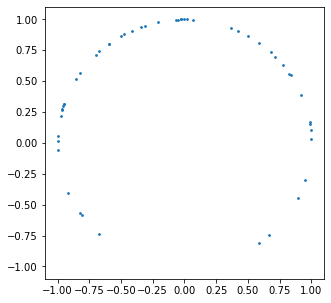

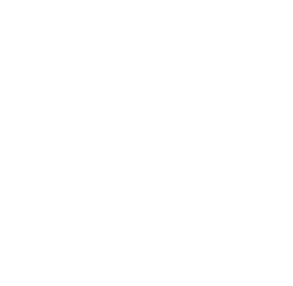

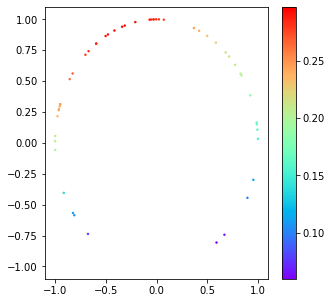

t = 0.2


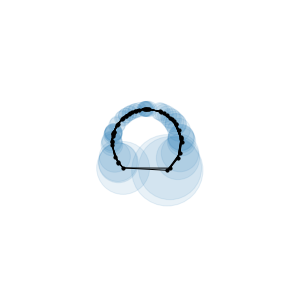

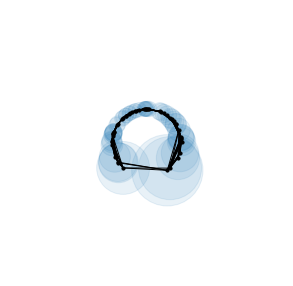

t = 0.4


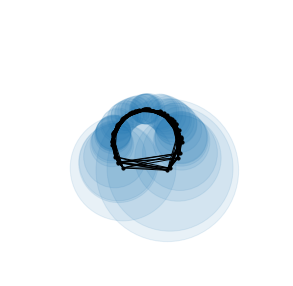

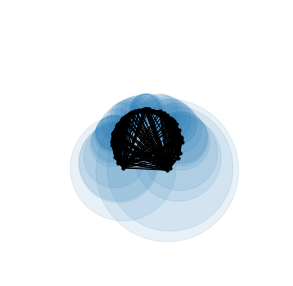

t = 0.6


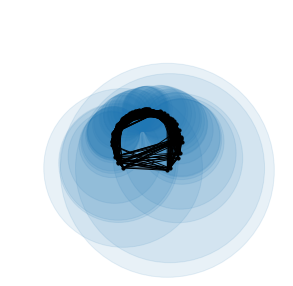

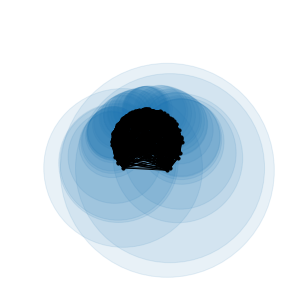

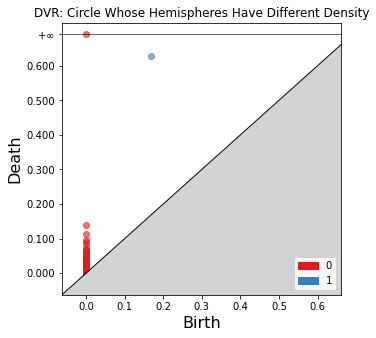

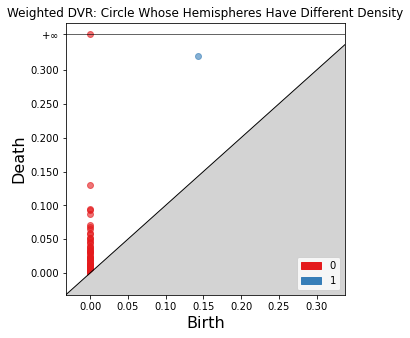

In [33]:
np.save('nonuniform_circle.npy', X)
run_analysis(X)

Is the difference more pronounced when w is larger?

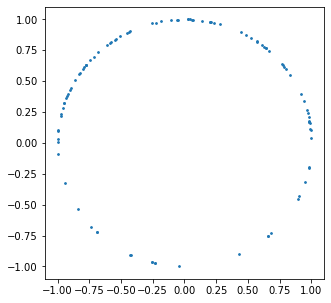

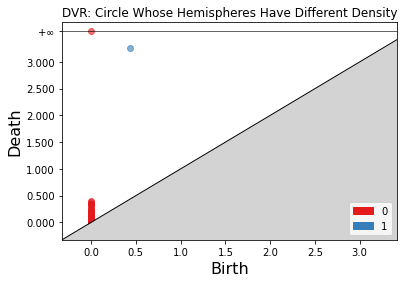

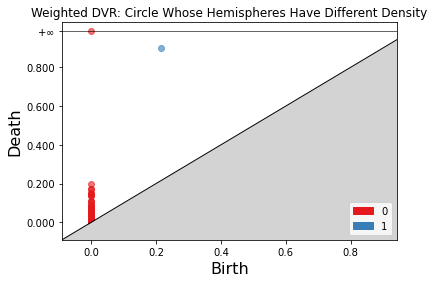

In [37]:
X = sample_nonuniform_circle(100, 5)
run_analysis(X)

Is the difference more pronounced when N is larger?

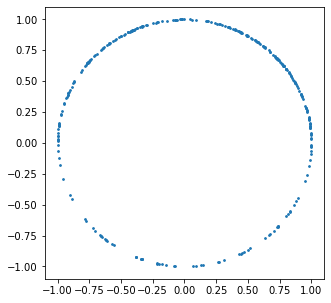

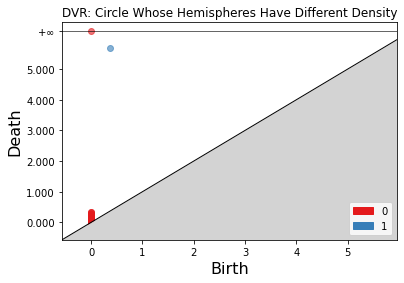

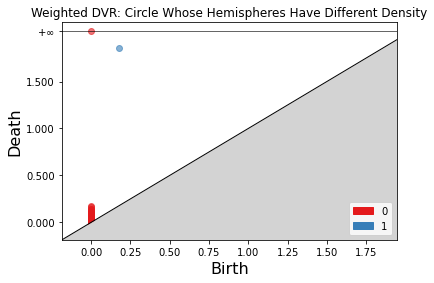

In [36]:
X = sample_nonuniform_circle(300, 3)
run_experiment(X)

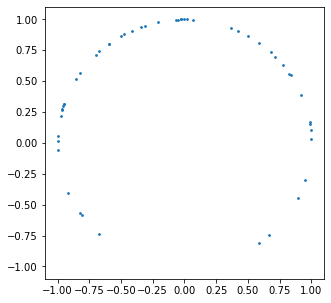

In [3]:
import numpy as np
X = np.load('nonuniform_circle.npy')
plot_nonuniform_circle(X)

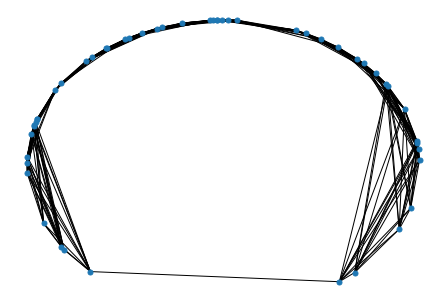

In [11]:
import DVR

geo_dist = DVR.density_geodesic_distance(X, 1, 10)

usetex mode requires ghostscript.


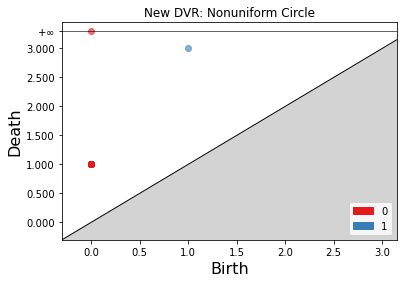

In [12]:
import gudhi as gd

geo_cpx = gd.RipsComplex(distance_matrix = geo_dist).create_simplex_tree(max_dimension = 2)
geo_ph = geo_cpx.persistence()
gd.plot_persistence_diagram(persistence = geo_ph, legend = True)
plt.title("New DVR: Nonuniform Circle")
plt.show()

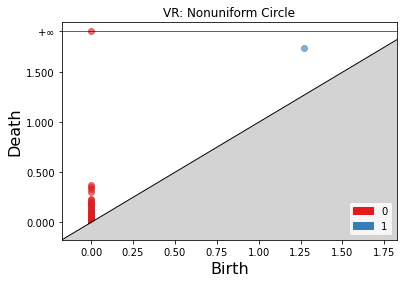

In [14]:
vr = gd.RipsComplex(points = X).create_simplex_tree(max_dimension = 2)
vr_ph = vr.persistence()
gd.plot_persistence_diagram(persistence = vr_ph, legend = True)
plt.title("VR: Nonuniform Circle")
plt.show()

computing Gknn for k = 1
computing Gknn for k = 2
computing Gknn for k = 3
computing Gknn for k = 4
computing Gknn for k = 5
computing Gknn for k = 6
computing Gknn for k = 7
computing Gknn for k = 8
Best k:  4
computing Gknn for k = 1
computing Gknn for k = 2
computing Gknn for k = 3
computing Gknn for k = 4
computing Gknn for k = 5
computing Gknn for k = 6
computing Gknn for k = 7
computing Gknn for k = 8
computing Gknn for k = 9
[17, 7, 2, 1, 1, 1, 1, 1, 1]


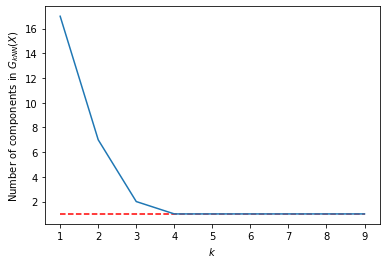

In [5]:
import DVR
k = DVR.choose_k(X)
print("Best k: ", k)
DVR.plot_Gknn_components(X, np.arange(1, k+6))

Redoing things with the biweight kernel + optimally chosen k

In [6]:
import DVR
import imp
imp.reload(DVR)

<module 'DVR' from 'C:\\Users\\abiga\\density\\DVR.py'>

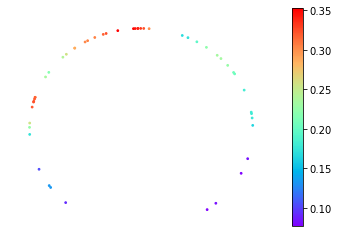

In [7]:
DVR.plot_density(X, 1, kernel = DVR.f_estimator.biweight)

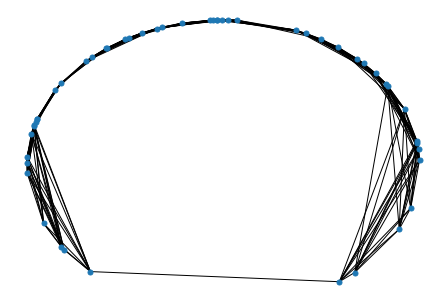

In [9]:
geo_dist = DVR.density_geodesic_distance(X, 1, 9, kernel = DVR.f_estimator.biweight)

usetex mode requires ghostscript.


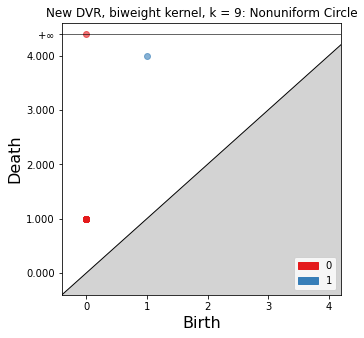

In [10]:
import gudhi as gd
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (5,5)

geo_cpx = gd.RipsComplex(distance_matrix = geo_dist).create_simplex_tree(max_dimension = 2)
geo_ph = geo_cpx.persistence()
gd.plot_persistence_diagram(persistence = geo_ph, legend = True)
plt.title("New DVR, biweight kernel, k = 9: Nonuniform Circle")
plt.show()

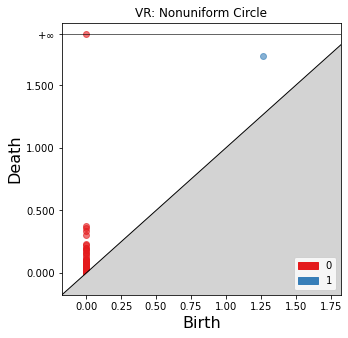

In [11]:
vr = gd.RipsComplex(points = X).create_simplex_tree(max_dimension = 2)
vr_ph = vr.persistence()
gd.plot_persistence_diagram(persistence = vr_ph, legend = True)
plt.title("VR: Nonuniform Circle")
plt.show()

knn test

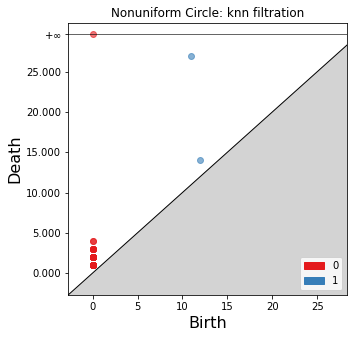

In [6]:
import numpy as np
import DVR
import gudhi as gd
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (5, 5)
X = np.load('nonuniform_circle.npy')
knnD = DVR.knn_distance(X)
knn_cpx = gd.RipsComplex(distance_matrix = knnD).create_simplex_tree(max_dimension = 2)
knn_ph = knn_cpx.persistence()
gd.plot_persistence_diagram(persistence = knn_ph, legend = True)
plt.title("Nonuniform Circle: knn filtration")
plt.show()

t = 0


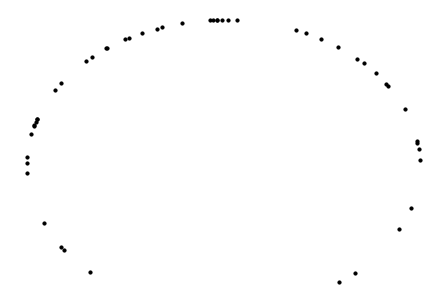

t = 5


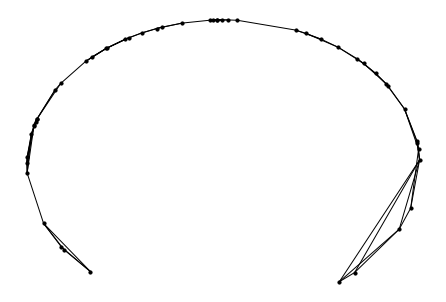

t = 10


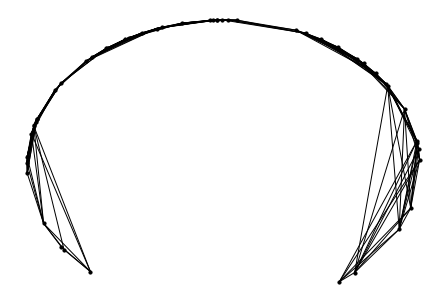

t = 15


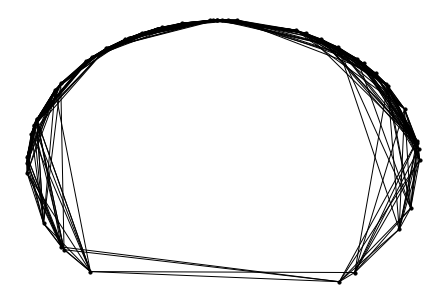

t = 20


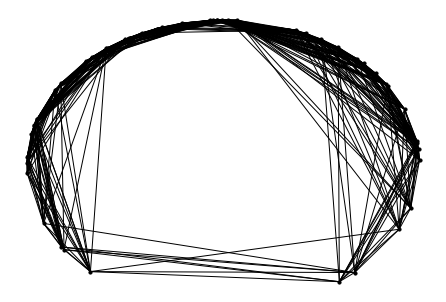

t = 25


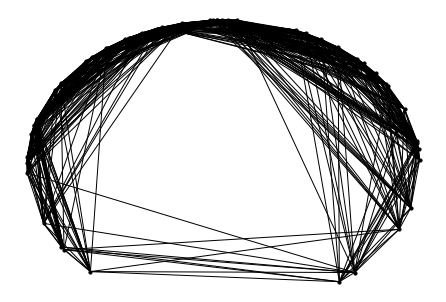

In [3]:
for t in range(0, 30, 5):
    print(f"t = {t}")
    DVR.plot_1skeleton(X, knnD, t)
    plt.show()